Data limited clients

In this file we have Convergence plot for 

- 1. Box plot for Data Limited (CFedDC, FedDC, and FedMEM)
- 2. Line plot for Data Limited (CFedDC, FedDC, and FedMEM)
- 1. Line plot for Data Rich (CFedDC, FedDC, and FedMEM)
- 2. Line plot for (CFedDC, FedDC, and FedMEM)
- 1. Box plot for (CFedDC, FedDC, and FedMEM)
- 2. Line plot for (CFedDC, FedDC, and FedMEM)


In [48]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import sys

In [83]:
# ─── CONFIGURATION ────────────────────────────────────────────────────────────
p_cwd = os.path.abspath(os.path.join(os.path.abspath(os.getcwd()), "..", ".."))

base_dir  = p_cwd + "/results/client_level"
algos     = ["CFedDC", "FedMEM", "FedDC"]
num_users = 535

# Prepare containers to hold each “resourceless” user’s per-round CMAE lists:
cmae_lists = { algo: [] for algo in algos }

# ─── STEP 1: COLLECT “RESOURCELESS” USERS’ CMAE DATA ───────────────────────────
for user_id in range(num_users):
    filename     = f"user_{user_id}_test_round_results.json"
    cfeddc_path  = os.path.join(base_dir, "CFedDC_KT_RL_rl1_C2_timm_mobilevit" ,"exp_no_1_CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0_30", "local_test", filename)
    # fedmem_path  = os.path.join(base_dir, "FedMEM", "local_test", filename)
    feddc_path   = os.path.join(base_dir, "exp_1_model_name_timm_mobilevit_FedDC", "local_test", filename)
   
    # 1a) Must have CFedDC JSON so we can check the resource_category
    if not os.path.exists(cfeddc_path):
        continue

    try:
        with open(cfeddc_path, "r") as f:
            data_cf = json.load(f)
    except Exception as e:
        print(f"[Warning] Could not read {cfeddc_path}: {e}")
        continue

    # 1b) Only keep users whose resource_category == "resourceless"
    rc = data_cf.get("resource_category", "Unknown").replace(" user", "").lower()
    # print(f"User {user_id} resource category: {rc}")
    
    if rc != "resourceless":
        continue

    # 1c) Now ensure FedDC JSON also exists
    if not os.path.exists(feddc_path):
        continue

    try:
        with open(feddc_path, "r") as f:
            data_fd = json.load(f)
    except Exception as e:
        print(f"[Warning] Could not read {feddc_path}: {e}")
        continue

    # 1d) Extract per-round CMAE (key is "info_cmae")
    cmae_cf = data_cf.get("validation_results", {}).get("info_cmae", [])
    # cmae_fm = data_fm.get("validation_results", {}).get("info_cmae", [])
    cmae_fd = data_fd.get("validation_results", {}).get("info_cmae", [])

    # 1e) Append each user's CMAE list to the respective algorithm's container
    cmae_lists["CFedDC"].append(cmae_cf)
    cmae_lists["FedDC"].append(cmae_fd)
    
# ─── STEP 2: ORGANIZE DATA “BY ROUND” ───────────────────────────────────────────
# Ensure we found at least one resourceless user for each algorithm
if len(cmae_lists["CFedDC"]) == 0 or len(cmae_lists["FedDC"]) == 0: # or len(cmae_lists["FedMEM"]) == 0
    raise RuntimeError("No resourceless users found for CFedDC and/or FedDC.")

# Find the maximum number of rounds across all resourceless users for each algorithm
max_rounds_cf = max(len(lst) for lst in cmae_lists["CFedDC"])
max_rounds_fd = max(len(lst) for lst in cmae_lists["FedDC"])
# max_rounds_fm = max(len(lst) for lst in cmae_lists["FedMEM"])

# We only want to plot up to the minimum of these two maxima,
# so that both algorithms have data for each round we show.
common_rounds = min(max_rounds_cf, max_rounds_fd, 30)

# Create lists of length common_rounds; each inner list accumulates all CMAE values at that round
cf_by_round = [[] for _ in range(common_rounds)]
fd_by_round = [[] for _ in range(common_rounds)]
# fm_by_round = [[] for _ in range(common_rounds)]

# Populate cf_by_round
for user_list in cmae_lists["CFedDC"]:
    for r in range(len(user_list)):
        if r < common_rounds:
            cf_by_round[r].append(user_list[r])

# Populate fd_by_round
for user_list in cmae_lists["FedDC"]:
    for r in range(len(user_list)):
        if r < common_rounds:
            fd_by_round[r].append(user_list[r])


CFedDC_DL = [136.31174320696647, 12.012133339693817, 2.909423767725961, 2.129159879209066, 4.297867190883015, 6.41025022335777, 4.4354309181606455, 2.113301135398924, 1.8231539668517414, 1.758479634745153, 1.5210002607819608, 1.452601617522011, 1.6065650696810814, 1.6866807888536877, 1.6411250037811154, 1.7066829606188267, 1.5029013891663616, 1.5433878105731658, 1.5666336748042426, 1.482567200861562, 1.6191914458220824, 1.4783765325609148, 2.397258858243474, 1.4745113977244675, 1.5275404139826394, 1.5524646212941602, 1.4645107430850146, 1.5860903120435585, 1.5403742865668704, 1.4373397944676956]
FedDC_DL = [472.20715862492943, 9.455225494866887, 4.203704843050921, 2.8010302976434414, 2.7882094074095, 2.908221696094766, 2.8713292154641854, 3.1608711579766475, 2.773076921584363, 3.8282656805750763, 3.8376589441832936, 3.486994547382683, 4.050098290087867, 2.845567602505353, 3.4434519681147187, 3.4422387926181828, 3.1336781882109195, 3.1366383882885427, 3.237973820464111, 3.819299358469, 

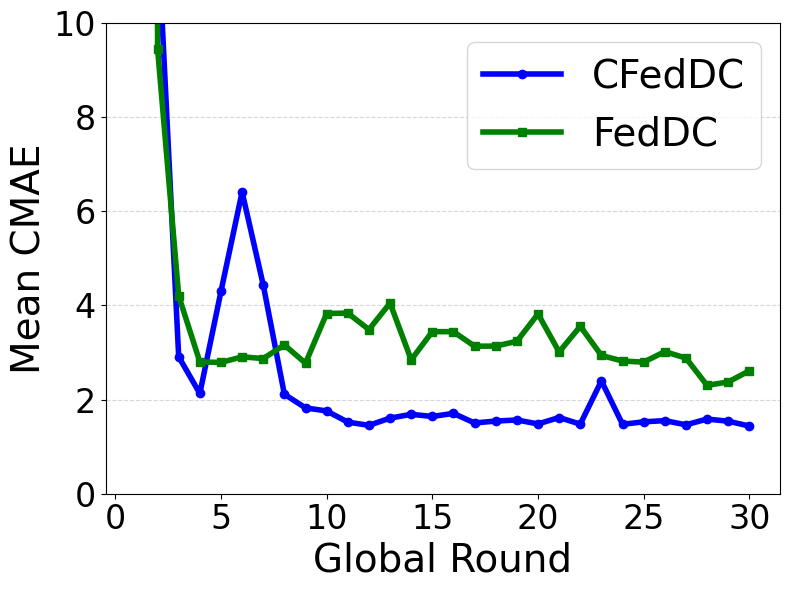

Saved line plot comparison at:
    /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae/resourceless_lineplot_FedDC_vs_CFedDC.png


In [84]:
# ─── STEP 3: DRAW LINE PLOT FOR EACH ALGORITHM ────────────────────────────────
plt.figure(figsize=(8, 6))

# Compute per-round average CMAE
mean_cf_by_round = [np.mean(r) if r else np.nan for r in cf_by_round]
mean_fd_by_round = [np.mean(r) if r else np.nan for r in fd_by_round]
# mean_fm_by_round = [np.mean(r) if r else np.nan for r in fm_by_round]

print(f"CFedDC_DL = {mean_cf_by_round}")
print(f"FedDC_DL = {mean_fd_by_round}")

rounds = np.arange(1, common_rounds + 1)

# Plot lines for each algorithm
plt.plot(rounds, mean_cf_by_round, marker='o', label='CFedDC', color='blue', linewidth=4)
plt.plot(rounds, mean_fd_by_round, marker='s', label='FedDC', color='green', linewidth=4)
# plt.plot(rounds, mean_fm_by_round, marker='^', label='FedMEM', color='blue', linewidth=2)

# Labels, title, and grid
plt.xlabel("Global Round", fontsize=28)
plt.ylabel("Mean CMAE", fontsize=28)
# plt.title("Resourceless Users: CMAE per Round (Line Plot)", fontsize=16)

plt.xticks(np.arange(0, common_rounds + 1, 5), fontsize=24)
plt.yticks(fontsize=24)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0.0, 10.0)
plt.legend(fontsize=28, loc="best")

plt.tight_layout()

# Save the figure
save_path = os.path.join(base_dir, "all_mae", "resourceless_lineplot_FedDC_vs_CFedDC.png")
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path)
plt.show()
plt.close()

print(f"Saved line plot comparison at:\n    {save_path}")


Data Rich

In [85]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# ─── CONFIGURATION ────────────────────────────────────────────────────────────
p_cwd = os.path.abspath(os.path.join(os.path.abspath(os.getcwd()), "..", ".."))

base_dir  = p_cwd + "/results/client_level"
algos     = ["CFedDC", "FedMEM", "FedDC"]
num_users = 535

# Prepare containers to hold each “resourceless” user’s per-round CMAE lists:
cmae_lists = { algo: [] for algo in algos }

# ─── STEP 1: COLLECT “RESOURCELESS” USERS’ CMAE DATA ───────────────────────────
for user_id in range(num_users):
    filename     = f"user_{user_id}_test_round_results.json"
    cfeddc_path  = os.path.join(base_dir, "CFedDC_KT_RL_rl1_C2_timm_mobilevit" ,"exp_no_1_CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0_30", "local_test", filename)
    # fedmem_path  = os.path.join(base_dir, "FedMEM", "local_test", filename)
    feddc_path   = os.path.join(base_dir, "exp_1_model_name_timm_mobilevit_FedDC", "local_test", filename)
   

    # 1a) Must have CFedDC JSON so we can check the resource_category
    if not os.path.exists(cfeddc_path):
        continue

    try:
        with open(cfeddc_path, "r") as f:
            data_cf = json.load(f)
    except Exception as e:
        print(f"[Warning] Could not read {cfeddc_path}: {e}")
        continue

    # 1b) Only keep users whose resource_category == "resourceless"
    rc = data_cf.get("resource_category", "Unknown").replace(" user", "").lower()
    if rc != "resourceful":
        continue

    # 1c) Now ensure FedDC JSON also exists
    if not os.path.exists(feddc_path):
        continue

    try:
        with open(feddc_path, "r") as f:
            data_fd = json.load(f)
    except Exception as e:
        print(f"[Warning] Could not read {feddc_path}: {e}")
        continue

    # 1c) Now ensure FedMEM JSON also exists
    # if not os.path.exists(fedmem_path):
    #    continue

    #try:
    #    with open(fedmem_path, "r") as f:
    #        data_fm = json.load(f)
    # except Exception as e:
    #    print(f"[Warning] Could not read {fedmem_path}: {e}")
    #    continue

    # 1d) Extract per-round CMAE (key is "info_cmae")
    cmae_cf = data_cf.get("validation_results", {}).get("info_cmae", [])
    # cmae_fm = data_fm.get("validation_results", {}).get("info_cmae", [])
    cmae_fd = data_fd.get("validation_results", {}).get("info_cmae", [])

    # Skip if either list is empty
    # if not cmae_cf or not cmae_fd or not cmae_fm: 
    #    continue

    # 1e) Append each user's CMAE list to the respective algorithm's container
    cmae_lists["CFedDC"].append(cmae_cf)
    cmae_lists["FedDC"].append(cmae_fd)
    # cmae_lists["FedMEM"].append(cmae_fm)

# ─── STEP 2: ORGANIZE DATA “BY ROUND” ───────────────────────────────────────────
# Ensure we found at least one resourceless user for each algorithm
if len(cmae_lists["CFedDC"]) == 0 or len(cmae_lists["FedDC"]) == 0:
    raise RuntimeError("No resourceless users found for CFedDC, FedMEM and/or FedDC.")

# Find the maximum number of rounds across all resourceless users for each algorithm
max_rounds_cf = max(len(lst) for lst in cmae_lists["CFedDC"])
max_rounds_fd = max(len(lst) for lst in cmae_lists["FedDC"])
# max_rounds_fm = max(len(lst) for lst in cmae_lists["FedMEM"])

# We only want to plot up to the minimum of these two maxima,
# so that both algorithms have data for each round we show.
common_rounds = min(max_rounds_cf, max_rounds_fd, 30)

# Create lists of length common_rounds; each inner list accumulates all CMAE values at that round
cf_by_round = [[] for _ in range(common_rounds)]
fd_by_round = [[] for _ in range(common_rounds)]
fm_by_round = [[] for _ in range(common_rounds)]

# Populate cf_by_round
for user_list in cmae_lists["CFedDC"]:
    for r in range(len(user_list)):
        if r < common_rounds:
            cf_by_round[r].append(user_list[r])

# Populate fd_by_round
for user_list in cmae_lists["FedDC"]:
    for r in range(len(user_list)):
        if r < common_rounds:
            fd_by_round[r].append(user_list[r])

# Populate fm_by_round
for user_list in cmae_lists["FedMEM"]:
    for r in range(len(user_list)):
        if r < common_rounds:
            fm_by_round[r].append(user_list[r])

# ─── STEP 3: DRAW GROUPED BOXPLOTS IN ONE FIGURE (GREY & BLACK) ───────────────
plt.figure(figsize=(12, 6))

# X positions: 1, 2, …, common_rounds
rounds = np.arange(1, common_rounds + 1)
print(f"Number of rounds to plot: {common_rounds}")
offset = 0.20  # horizontal shift so boxes don't overlap exactly

# Positions for CFedDC and FedDC boxes
pos_cf = rounds - offset
pos_fd = rounds + offset
pos_fm = rounds + 2 * offset  # For FedMEM, if needed



Number of rounds to plot: 30


<Figure size 1200x600 with 0 Axes>

CFedDC_DR =  [682.0890743339462, 7.310358790805377, 2.807244485097628, 2.132582245157139, 2.3900522537820246, 2.2528882672539075, 2.3202847085800933, 2.256727071072474, 2.266632198474328, 2.40981909165272, 2.477800155412506, 2.2220313039585653, 2.427803655753941, 2.097379806291871, 2.482213454711675, 2.196462816104143, 2.1878685932547324, 2.0790369454068753, 2.074047454174766, 1.9280433258774914, 2.1840016197430026, 1.938912058776906, 2.0775326101995546, 2.1871310441461134, 2.140588048436382, 1.9691747737781258, 1.8552693209586335, 1.8963690756623082, 1.8728383302432543, 1.8178758421991181]
FedDC_DR = [95.93021493741514, 19.63161845758128, 2.865106138223366, 3.062398090873533, 2.5743919993307944, 3.7327229195509983, 2.8590196541918345, 3.5036679736600984, 3.156122416946334, 3.329756836397583, 3.3550559247176523, 3.3623470657873047, 2.714209310119331, 2.9831700281186477, 3.3486368491217107, 13.43058018098724, 2.8582842033852813, 2.971062522415341, 2.607598488936826, 4.323333040891113, 2

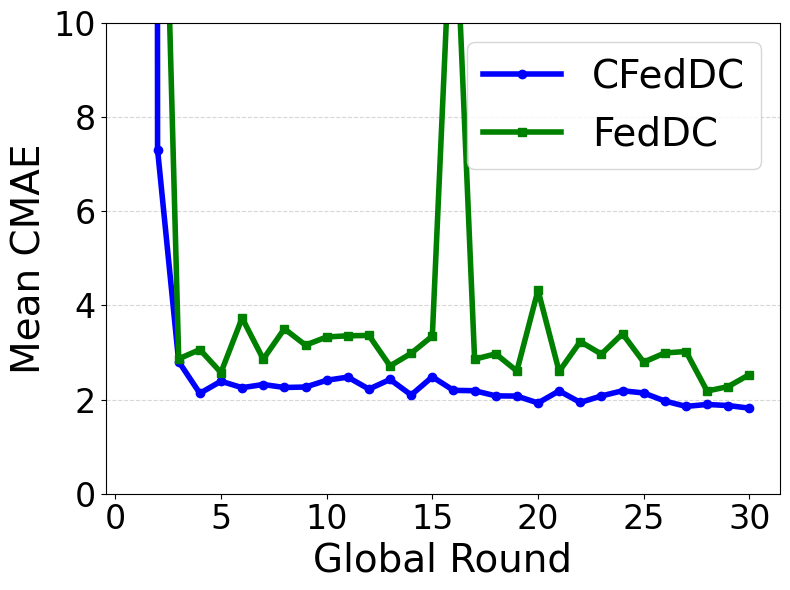

Saved line plot comparison at:
    /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae/resourceful_lineplot_FedDC_vs_CFedDC.png


In [86]:
# ─── STEP 3: DRAW LINE PLOT FOR EACH ALGORITHM ────────────────────────────────
plt.figure(figsize=(8, 6))

# Compute per-round average CMAE
mean_cf_by_round = [np.mean(r) if r else np.nan for r in cf_by_round]
mean_fd_by_round = [np.mean(r) if r else np.nan for r in fd_by_round]
# mean_fm_by_round = [np.mean(r) if r else np.nan for r in fm_by_round]

print(f"CFedDC_DR =  {mean_cf_by_round}")
print(f"FedDC_DR = {mean_fd_by_round}")

rounds = np.arange(1, common_rounds + 1)

# Plot lines for each algorithm
plt.plot(rounds, mean_cf_by_round, marker='o', label='CFedDC', color='blue', linewidth=4)
plt.plot(rounds, mean_fd_by_round, marker='s', label='FedDC', color='green', linewidth=4)


# plt.plot(rounds, mean_fm_by_round, marker='^', label='FedMEM', color='blue', linewidth=2)

# Labels, title, and grid
plt.xlabel("Global Round", fontsize=28)
plt.ylabel("Mean CMAE", fontsize=28)
# plt.title("Resourceful Users: CMAE per Round (Line Plot)", fontsize=16)
plt.xticks(np.arange(0, common_rounds + 1, 5), fontsize=24)
plt.yticks(fontsize=24)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0.0, 10.0)
plt.legend(fontsize=28, loc="best")

plt.tight_layout()

# Save the figure
save_path = os.path.join(base_dir, "all_mae", "resourceful_lineplot_FedDC_vs_CFedDC.png")
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path)
plt.show()
plt.close()

print(f"Saved line plot comparison at:\n    {save_path}")
